In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import openpyxl

df= pd.read_excel('C:\\Users\\santo\\Downloads\\Traing_Data_analysis.xlsx')

                                               question  \
0                         what is a recursive function?   
1     what are the similarities between iteration an...   
2                                      what is a queue?   
3                                    what is a pointer?   
4                    what is the role of a header-file?   
...                                                 ...   
1795  how can an array be addressed in pointer/offse...   
1796             what is the scope of global variables?   
1797     how does the compiler handle inline functions?   
1798  what is the main difference between strings de...   
1799  what is typically included in a class definition?   

                                           model_answer  \
0                         a function that calls itself.   
1     they both involve repetition; they both have t...   
2     a data structure that can store elements, whic...   
3                  the address of a location in memory.

In [13]:
mean0fgrade = df['grade'].mean()
class1_feat_vecs = np.array([]) 
class2_feat_vecs = np.array([]) 

# Create a new column in df based on the condition
df['results'] = np.where(df['grade'] > mean0fgrade, 1, 0)

# Append values to class1_feat_vecs and class2_feat_vecs based on the new column
class1_feat_vecs = np.append(class1_feat_vecs, df[df['results'] == 1]['grade'].values)
class2_feat_vecs = np.append(class2_feat_vecs, df[df['results'] == 0]['grade'].values)

centroid1 = class1_feat_vecs.mean(axis=0)
centroid2 = class2_feat_vecs.mean(axis=0)

# Calculate the spread (standard deviation) for each class
spread1 = class1_feat_vecs.std(axis=0)
spread2 = class2_feat_vecs.std(axis=0)

# Calculate the distance between the centroids of the two classes
interclass_distance = np.linalg.norm(centroid1 - centroid2)

print(f"Centroid of Class 1: {centroid1}, Spread: {spread1}")
print(f"Centroid of Class 2: {centroid2}, Spread: {spread2}")
print(f"Interclass Distance: {interclass_distance}")
result = df['results'] 
grade = df['grade'] 

Centroid of Class 1: 0.9767086330935251, Spread: 0.04226877001138608
Centroid of Class 2: 0.600436046511628, Spread: 0.18493347792865555
Interclass Distance: 0.3762725865818971


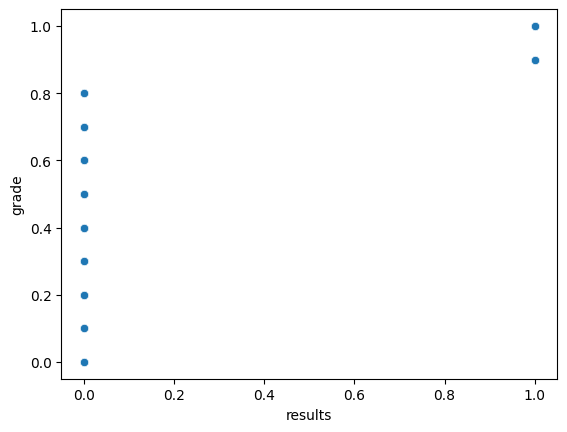

In [14]:
import seaborn as sns

sns.scatterplot(x=result, y='grade', data=df)

plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train,X_test,y_train,y_test=train_test_split(grade,result,test_size=0.3)
knn=KNeighborsClassifier(n_neighbors=3)
import numpy as np

# Assuming grade is a numpy array
grade_reshaped = grade.to_numpy().reshape(-1, 1)

# Now use grade_reshaped in the fit method
knn.fit(grade_reshaped, result)
# Reshape X_test to a 2D array
X_test_reshaped = X_test.to_numpy().reshape(-1, 1)

# Now use X_test_reshaped in the score method
print(knn.score(X_test_reshaped, y_test))
knn.predict(X_test_reshaped)


1.0


array([0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,